# Les colonnes typiques des données via yfinance incluent :

### Open : Prix à l'ouverture./
### High : Prix le plus haut./
### Low : Prix le plus bas./
### Close : Prix de clôture (souvent utilisé pour l'analyse)./
### Volume : Volume des échanges./
### Adj Close : Prix de clôture ajusté (après divisions d'actions ou dividendes)./

In [5]:
import pandas as pd
import yfinance as yf

data = pd.read_csv('../data/cleaned/Cleaned_Apple_Stock_Data.csv')
data.head()

ModuleNotFoundError: No module named 'pandas'

In [3]:
df=data[["Date", "Close"]]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_11076\2831696324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [4]:
df.head

<bound method NDFrame.head of                  Close
Date                  
2018-01-02   43.064999
2018-01-03   43.057499
2018-01-04   43.257500
2018-01-05   43.750000
2018-01-08   43.587502
...                ...
2023-12-22  193.600006
2023-12-26  193.050003
2023-12-27  193.149994
2023-12-28  193.580002
2023-12-29  192.529999

[1509 rows x 1 columns]>

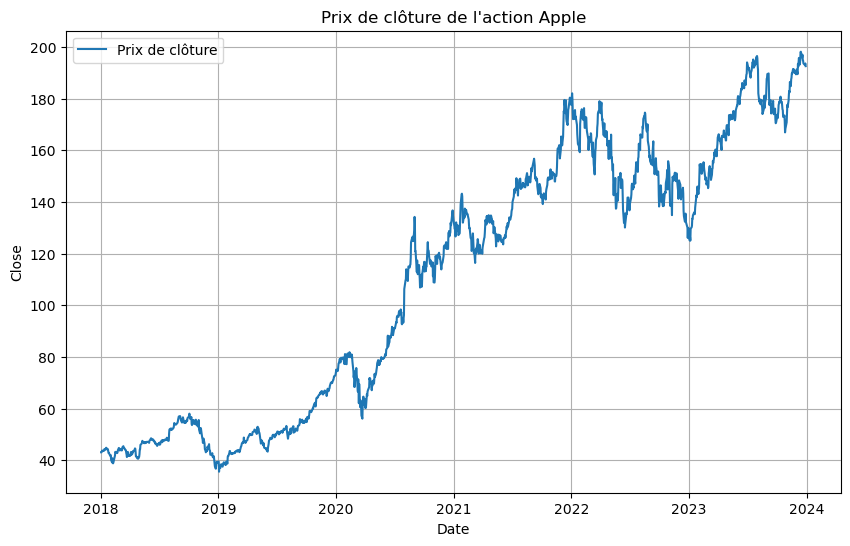

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Prix de clôture')
plt.title("Prix de clôture de l'action Apple")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid()
plt.legend()
plt.show()


### de-trend

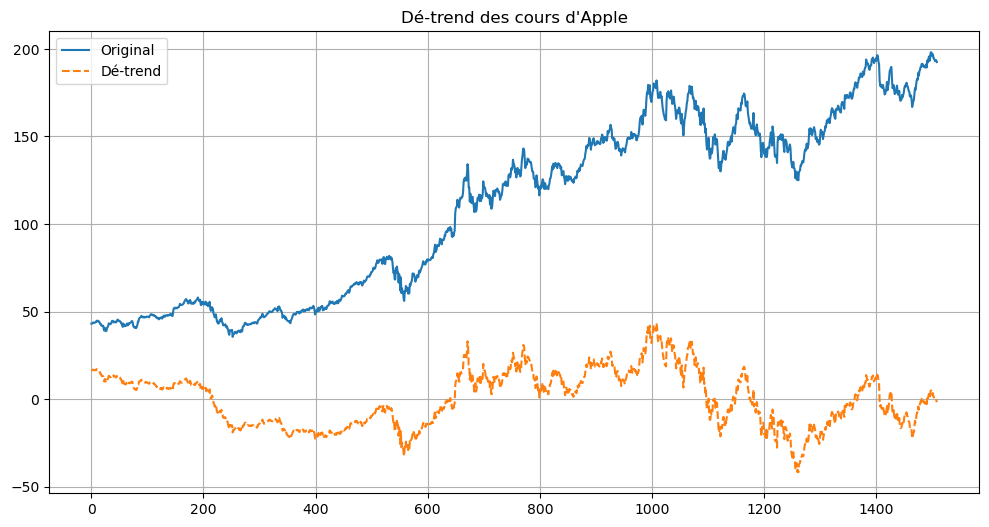

In [6]:
import numpy as np
from scipy.stats import linregress

# Calculer la tendance linéaire
time = np.arange(len(data))
slope, intercept, _, _, _ = linregress(time, data['Close'])
trend = slope * time + intercept

# Dé-trend
data['detrended'] = data['Close'] - trend

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label="Original")
plt.plot(data.index, data['detrended'], label="Dé-trend", linestyle='--')
plt.title("Dé-trend des cours d'Apple")
plt.grid()
plt.legend()
plt.show()


### Différenciation

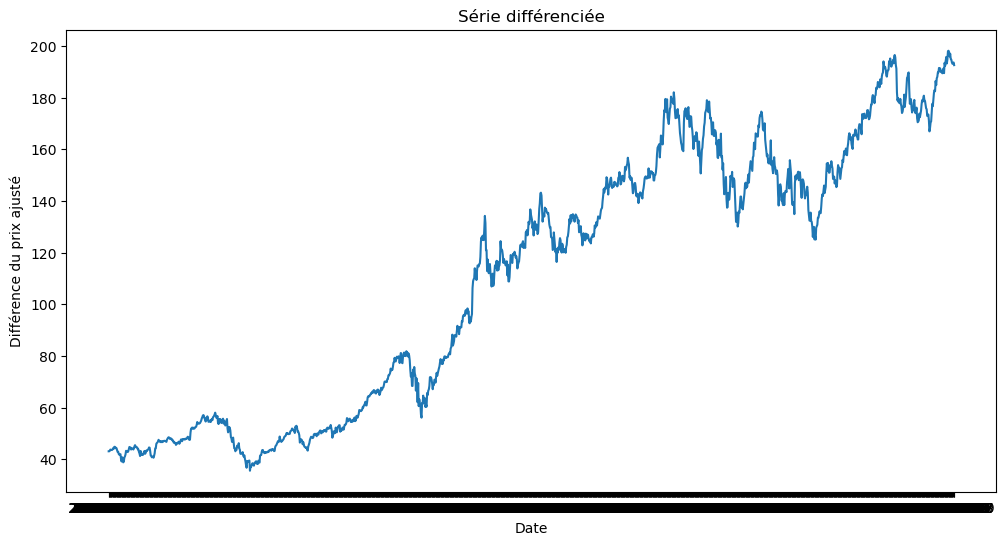

In [7]:
data['diff_1'] = data['Close'].diff()

# Visualisation
# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['diff_1'], label="Différenciée (1er ordre)", linestyle='--')
# plt.title("Différenciation de premier ordre (Apple)")
# plt.grid()
# plt.legend()
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'])
plt.title("Série différenciée")
plt.xlabel("Date")
plt.ylabel("Différence du prix ajusté")
plt.show()


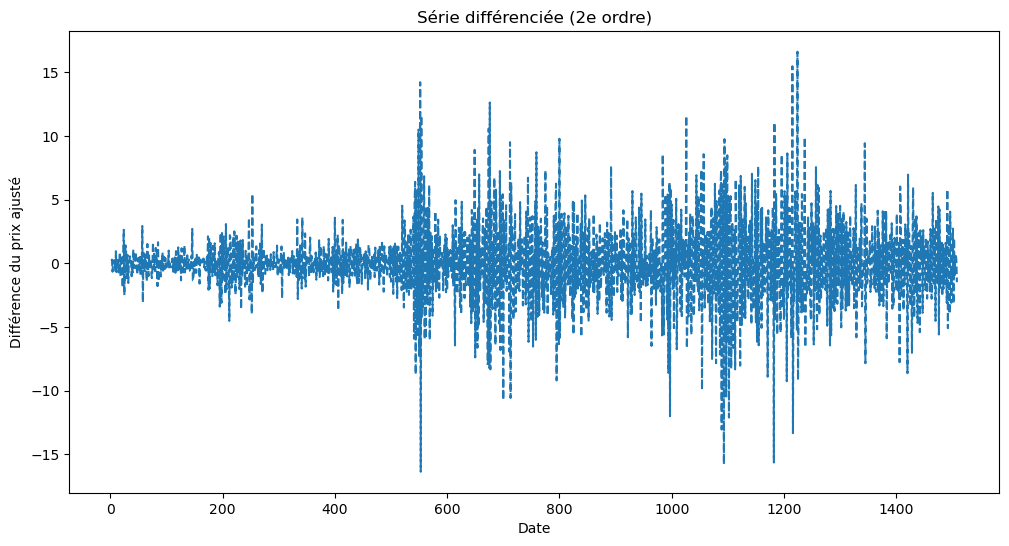

In [8]:
data['diff_2'] = data['diff_1'].diff()

# plt.figure(figsize=(12, 6))
# plt.plot(data.index, data['diff_2'], label="Différenciée (2e ordre)", linestyle='--')
# plt.title("Différenciation de second ordre (Apple)")
# plt.grid()
# plt.legend()
# plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['diff_2'], label="Différenciée (2e ordre)", linestyle='--')
plt.title("Série différenciée (2e ordre)")
plt.xlabel("Date")
plt.ylabel("Différence du prix ajusté")
plt.show()


# Confirmer la stationnarité (test-ADF)

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['diff_1'].dropna())
print("Statistique ADF :", result[0])
print("p-valeur :", result[1])

if result[1] < 0.05:
    print("La série est stationnaire (p-valeur < 0.05).")
else:
    print("La série n'est pas stationnaire (p-valeur >= 0.05).")


Statistique ADF : -40.35984367996531
p-valeur : 0.0
La série est stationnaire (p-valeur < 0.05).


In [10]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from prophet import Prophet


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2018-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1509 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


In [13]:
print(df.isnull().sum())

Close    0
dtype: int64


In [4]:
df = data[['Date', 'Close']]
df['Date']= pd.to_datetime(df['Date'])

df.plot(x='Date', y='Close')


df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)  # 30 jours de prévision
forecast = model.predict(future)



NameError: name 'data' is not defined

In [ ]:
# model = Prophet()
# model.fit(df)